# Final Project Module D EDA

## Disease Activity

We plan to focus on the ongoing Covid-19 pandemic. Therefore, our EDA will look at the two Covid datasources:
- John Hopkins University Center for Systems Science and Engineering (CSSEGIS): https://github.com/CSSEGISandData/COVID-19
- Midas Network: https://github.com/midas-network/COVID-19

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## CSSEGIS Data

The CSSEGIS data has a few different data segments. The two folders we will mainly be looking at are the daily reports and the time series data. Let us further investigate the data.

### Daily Reports

There exists a daily report for each day starting from 01/22/2020 - present. Let us investigate the form of the daily reports by looking at the most recent CSV:

In [3]:
# Daily report 
april_06_dr = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-06-2020.csv')
april_06_dr.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,4/6/20 23:22,34.223334,-82.461707,6,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,4/6/20 23:22,30.295065,-92.414197,79,2,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,4/6/20 23:22,37.767072,-75.632346,11,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,4/6/20 23:22,43.452658,-116.241552,402,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,4/6/20 23:22,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [4]:
# Number of countries/regions listed
print(f"{len(april_06_dr.Country_Region.unique())} countries/regions are represented")

184 countries/regions are represented


In [5]:
US_countries_idx = np.where(april_06_dr.Country_Region == "US")
april_06_dr.iloc[US_countries_idx].Province_State.unique()

array(['South Carolina', 'Louisiana', 'Virginia', 'Idaho', 'Iowa',
       'Kentucky', 'Missouri', 'Oklahoma', 'Colorado', 'Illinois',
       'Indiana', 'Mississippi', 'Nebraska', 'Ohio', 'Pennsylvania',
       'Washington', 'Wisconsin', 'Vermont', 'Florida', 'North Carolina',
       'California', 'New York', 'Wyoming', 'Michigan', 'Maryland',
       'Alaska', 'Kansas', 'Tennessee', 'Texas', 'Maine', 'Minnesota',
       'Arizona', 'Georgia', 'Arkansas', 'New Jersey', 'South Dakota',
       'Alabama', 'West Virginia', 'North Dakota', 'Massachusetts',
       'Montana', 'New Hampshire', 'Oregon', 'New Mexico', 'Utah',
       'Rhode Island', 'Nevada', 'District of Columbia', 'Connecticut',
       'Hawaii', 'Delaware', 'Northern Mariana Islands',
       'Diamond Princess', 'Grand Princess', 'Guam', 'Puerto Rico',
       'Recovered', 'Virgin Islands'], dtype=object)

In [6]:
# Top confirmed cases in the US
april_06_dr.iloc[US_countries_idx].sort_values(by = ['Confirmed'], ascending = False)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
1636,36061.0,New York City,New York,US,4/6/20 23:22,40.767273,-73.971526,72181,3485,0,0,"New York City, New York, US"
1618,36059.0,Nassau,New York,US,4/6/20 23:22,40.740665,-73.589419,15616,162,0,0,"Nassau, New York, US"
2441,36119.0,Westchester,New York,US,4/6/20 23:22,41.162784,-73.757417,14294,211,0,0,"Westchester, New York, US"
2146,36103.0,Suffolk,New York,US,4/6/20 23:22,40.883201,-72.801217,14185,199,0,0,"Suffolk, New York, US"
513,17031.0,Cook,Illinois,US,4/6/20 23:22,41.841448,-87.816588,8728,209,0,0,"Cook, Illinois, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
756,51063.0,Floyd,Virginia,US,4/6/20 23:22,36.930213,-80.367388,0,0,0,0,"Floyd, Virginia, US"
261,46019.0,Butte,South Dakota,US,4/6/20 23:22,44.906087,-103.507932,0,0,0,0,"Butte, South Dakota, US"
729,51610.0,Falls Church,Virginia,US,4/6/20 23:22,38.884853,-77.175608,0,0,0,0,"Falls Church, Virginia, US"
723,51600.0,Fairfax City,Virginia,US,4/6/20 23:22,38.851575,-77.297796,0,0,0,0,"Fairfax City, Virginia, US"


In [7]:
april_06_dr.sort_values(by = ['Confirmed'], ascending = False).head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2781,NaN,NaN,NaN,Spain,4/6/20 23:21,40.463667,-3.749220,136675,13341,40437,82897,Spain
2709,NaN,NaN,NaN,Italy,4/6/20 23:21,41.871940,12.567380,132547,16523,22837,93187,Italy
2690,NaN,NaN,NaN,Germany,4/6/20 23:21,51.165691,10.451526,103374,1810,28700,72864,Germany
2686,NaN,NaN,NaN,France,4/6/20 23:21,46.227600,2.213700,98010,8911,17250,71849,France
1636,36061.0,New York City,New York,US,4/6/20 23:22,40.767273,-73.971526,72181,3485,0,0,"New York City, New York, US"
2575,NaN,NaN,Hubei,China,4/6/20 2:21,30.975600,112.270700,67803,3212,64014,577,"Hubei, China"
2705,NaN,NaN,NaN,Iran,4/6/20 23:21,32.427908,53.688046,60500,3739,24236,32525,Iran
2799,NaN,NaN,NaN,United Kingdom,4/6/20 23:21,55.378100,-3.436000,51608,5373,135,46100,United Kingdom
2795,NaN,NaN,NaN,Turkey,4/6/20 23:21,38.963700,35.243300,30217,649,1326,28242,Turkey
2786,NaN,NaN,NaN,Switzerland,4/6/20 23:21,46.818200,8.227500,21657,765,8056,12836,Switzerland


In [29]:
april_06_dr_by_country = april_06_dr.groupby(['Country_Region']).sum().reset_index()
april_06_dr_by_country.sort_values(by = ['Confirmed'], ascending = False).head(10)

,Country_Region,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
171,US,78475165.0,94795.211139,-225617.625269,366667,10783,19581,0
156,Spain,0.0,40.463667,-3.749220,136675,13341,40437,82897
84,Italy,0.0,41.871940,12.567380,132547,16523,22837,93187
65,Germany,0.0,51.165691,10.451526,103374,1810,28700,72864
61,France,0.0,91.463495,-238.646914,98963,8926,17428,72609
36,China,0.0,1083.336700,3684.419700,82665,3335,77310,2020
80,Iran,0.0,32.427908,53.688046,60500,3739,24236,32525
175,United Kingdom,0.0,270.029898,-482.924666,52279,5385,287,46607
170,Turkey,0.0,38.963700,35.243300,30217,649,1326,28242
161,Switzerland,0.0,46.818200,8.227500,21657,765,8056,12836


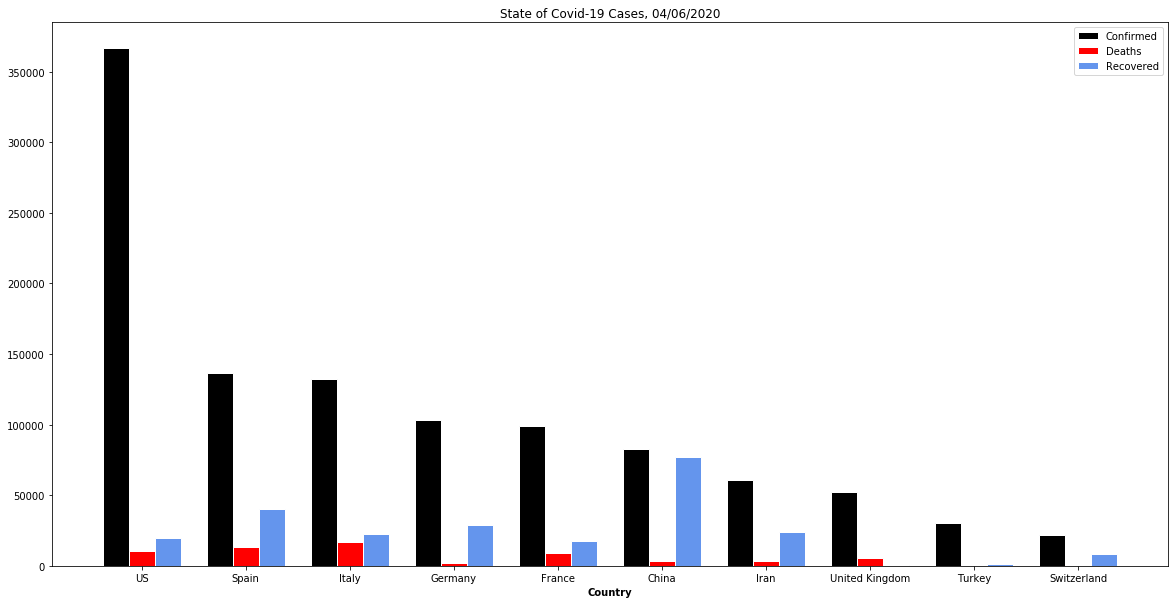

In [34]:
top10cases = april_06_dr_by_country.sort_values(by = ['Confirmed'], ascending = False).head(10)

# set width of bar
plt.figure(figsize=(20,10))
barWidth = 0.25
 
# Set position of bar on X axis
confirmed = np.arange(10)
deaths = [x + barWidth for x in confirmed]
recovered = [x + barWidth for x in deaths]
 
# Make the plot
plt.bar(confirmed, top10cases.Confirmed, color="black", width=barWidth, edgecolor='white', label='Confirmed')
plt.bar(deaths, top10cases.Deaths, color="red", width=barWidth, edgecolor='white', label='Deaths')
plt.bar(recovered, top10cases.Recovered, color='cornflowerblue', width=barWidth, edgecolor='white', label='Recovered')
 
# Add xticks on the middle of the group bars
plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(10)], top10cases.Country_Region)
 
# Create legend & Show graphic
plt.legend()
plt.title("State of Covid-19 Cases, 04/06/2020")
plt.show()


The daily reports list the amount of confirmed cases, deaths, and recovered cases for a province/state in a country.

### Time Series

In [41]:
# Time Series - Global confirmed cases
ts_global_confirmed = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
ts_global_confirmed.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


In [42]:
# Time Series - Global deaths
ts_global_deaths = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
ts_global_deaths.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,6,6,7,7,11,14
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,10,11,15,15,16,17,20,20,21,22
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,31,35,44,58,86,105,130,152,173,193
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,6,8,12,14,15,16,17,18,21,22
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [43]:
# Time Series - Global recovered
ts_global_recovered = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
ts_global_recovered.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,5,5,10,10,10,15,18,18
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,44,52,67,76,89,99,104,116,131
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,31,37,46,61,61,62,90,90,90,113
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,10,10,10,10,16,21,26,31,39
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,1,1,1,2,2,2,2


In [77]:
ts_global_confirmed_by_country = ts_global_confirmed.groupby(['Country/Region']).sum().reset_index()
ts_top10confirmed = ts_global_confirmed_by_country.loc[ts_global_confirmed_by_country['Country/Region'].isin(top10cases.Country_Region)]
ts_top10confirmed


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
36,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,82122,82198,82279,82361,82432,82511,82543,82602,82665,82718
61,France,91.3624,59.7192,0,0,2,3,3,3,4,...,40708,45170,52827,57749,59929,65202,90848,93773,98963,110065
65,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663
80,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,38309,41495,44605,47593,50468,53183,55743,58226,60500,62589
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586
156,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942
161,Switzerland,46.8182,8.2275,0,0,0,0,0,0,0,...,14829,15922,16605,17768,18827,19606,20505,21100,21657,22253
170,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,...,9217,10827,13531,15679,18135,20921,23934,27069,30217,34109
171,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,140909,161837,188172,213372,243616,275586,308850,337072,366667,396223
175,United Kingdom,270.0299,-482.9247,0,0,0,0,0,0,0,...,19780,22453,25481,29865,34173,38689,42477,48436,52279,55949


In [98]:
ts_top10confirmed['Country/Region'].iloc[0]

'China'

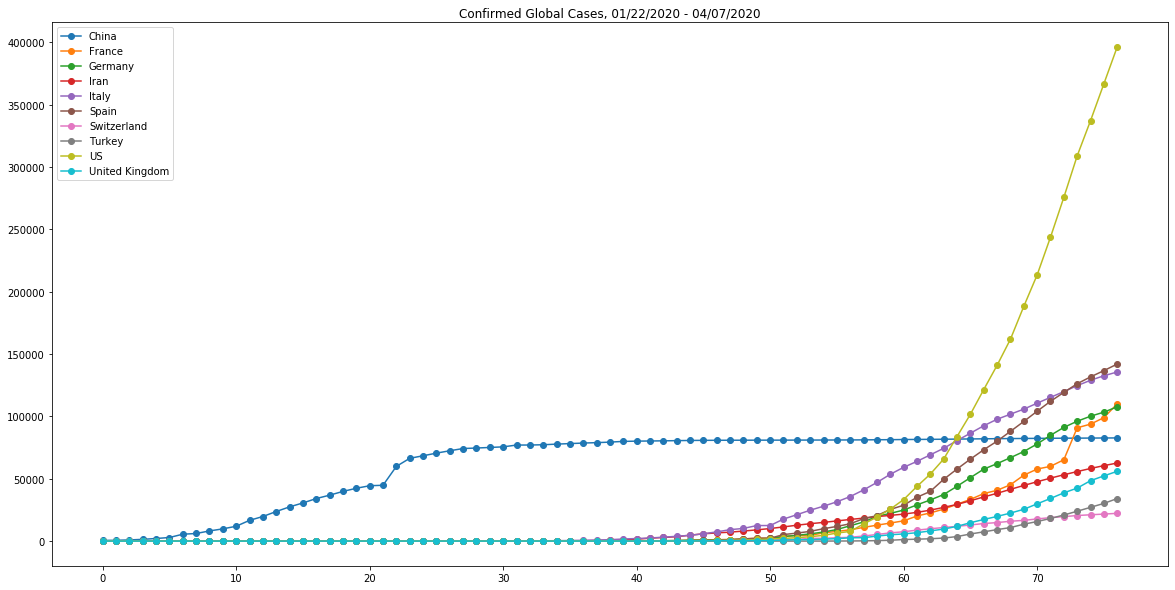

In [111]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.plot(range(len(ts_top10confirmed.T[3:])), ts_top10confirmed.T[3:].T.iloc[i], marker = 'o', 
             label = ts_top10confirmed['Country/Region'].iloc[i])

plt.legend()
plt.title("Confirmed Global Cases, 01/22/2020 - 04/07/2020")
plt.show()

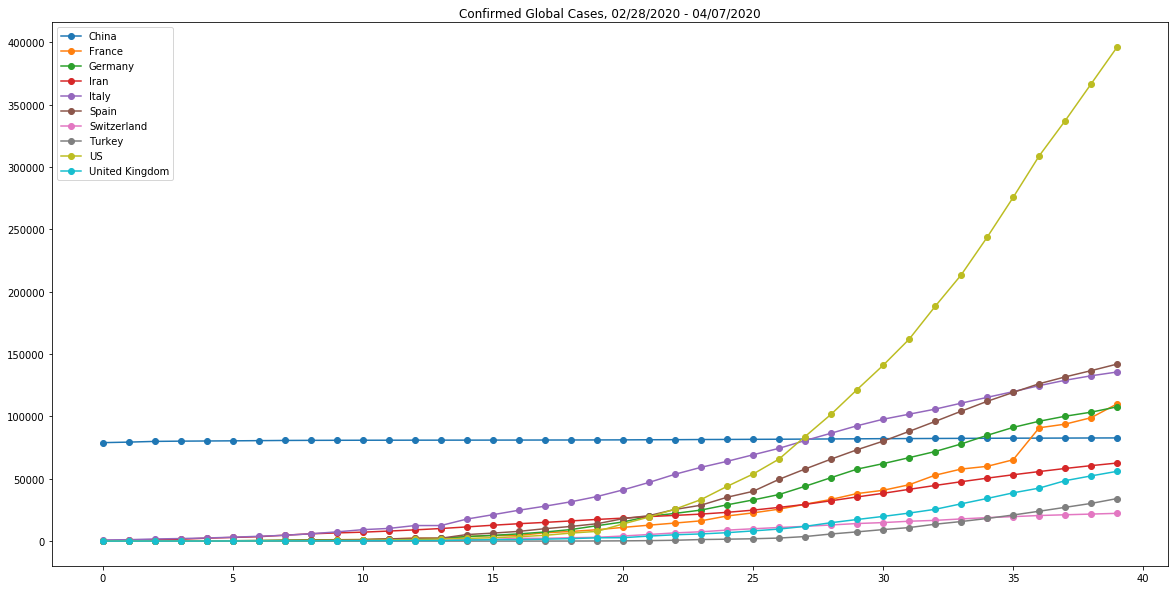

In [116]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.plot(range(len(ts_top10confirmed.T[40:])), ts_top10confirmed.T[40:].T.iloc[i], marker = 'o', 
             label = ts_top10confirmed['Country/Region'].iloc[i])

plt.legend()
plt.title("Confirmed Global Cases, 02/28/2020 - 04/07/2020")
plt.show()

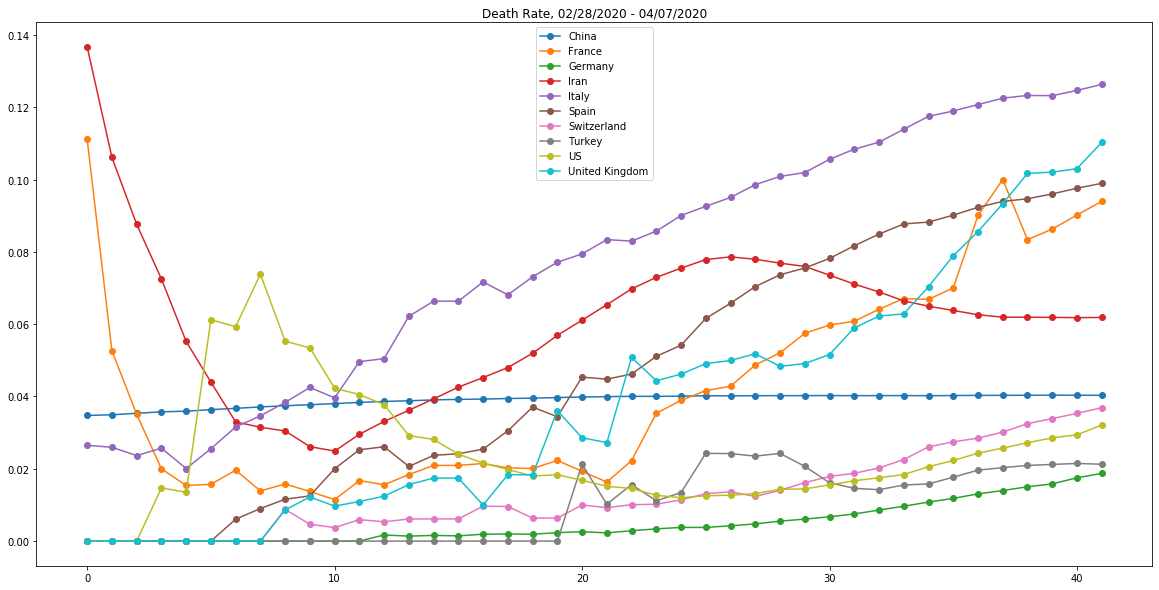

In [155]:
ts_global_death_by_country = ts_global_deaths.groupby(['Country/Region']).sum().reset_index()
ts_top10deaths = ts_global_death_by_country.loc[ts_global_death_by_country['Country/Region'].isin(top10cases.Country_Region)]

df_death_rate = ts_top10deaths.T[3:].T / (ts_top10confirmed.T[3:].T + 0.000001)
df_left = ts_top10deaths.T[:3].T
ts_top10_death_rate = pd.concat([df_left, df_death_rate], axis = 1, sort = False) 

plt.figure(figsize=(20,10))
for i in range(10):
    plt.plot(range(len(ts_top10_death_rate.T[38:])), ts_top10_death_rate.T[38:].T.iloc[i], marker = 'o', 
             label = ts_top10_death_rate['Country/Region'].iloc[i])

plt.legend()
plt.title("Death Rate, 02/28/2020 - 04/07/2020")
plt.show()


In [44]:
# Time Series - US confirmed
ts_US_confirmed = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
ts_US_confirmed.head()


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,56,58,69,77,82,84,93,112,113,121
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,2,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,127,174,239,286,316,316,452,475,513,573
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,23,30,30,30,30,37,40,42,43,43


In [45]:
# Time Series - US deaths
ts_US_deaths = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
ts_US_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,1,1,2,3,3,4,4,4,4,4
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,1,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,3,6,8,11,12,15,18,20,21,23
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,0,0,0,0,0,1,1,1


## Midas Network Data